# Capstone 2 Modeling

**The Data Science Method**  

1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   Exploratory Data Analysis
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
  
5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Data Collection

In [1]:
#load python packages
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# load the csv files in data/processed folder
df2 = pd.read_csv('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\data\\processed\\df24.csv', index_col='Date')
df6 = pd.read_csv('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\data\\processed\\df2016.csv', index_col='Date')
df7 = pd.read_csv('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\data\\processed\\df2017.csv', index_col='Date')
# change indexes to time series
df2.index = pd.to_datetime(df2.index)
df6.index = pd.to_datetime(df6.index)
df7.index = pd.to_datetime(df7.index)
df2.head()

,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Daily
Date,,,,,,,,,,,,,,
2016-01-04,16.39,36.27,78.68,51.44,57.70,148.93,74.55,50.34,56.02,79.35,58.34,31.68,0.00,739.69
2016-01-05,22.45,27.75,7.25,30.64,100.67,149.72,43.14,68.53,93.65,75.90,27.45,31.70,0.00,678.85
2016-01-06,33.59,41.48,111.56,92.00,94.83,94.27,45.26,70.35,57.22,52.53,46.87,49.12,0.00,789.08
2016-01-07,8.40,23.30,54.49,42.28,116.13,101.65,52.04,47.96,128.00,77.01,91.02,75.42,0.00,817.70
2016-01-08,27.25,86.00,48.34,65.21,186.20,158.67,93.76,117.30,143.23,105.70,182.96,89.71,64.12,1368.45


In [3]:
dfts = pd.read_csv('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\data\\processed\\dfts.csv', index_col='Date')
dfts.index = pd.to_datetime(dfts.index)
len(dfts)

9464

# Correlograms

Autocorrelogram & Partial Autocorrelogram is useful that to estimate each models parameaers.

In [4]:
#train_test_split, since we only have 2 years of data, we test the last 4 months
train_start,train_end = '2016-01-04','2017-08-31'
test_start,test_end = '2017-09-01','2017-12-31'
train = df2['Daily'][train_start:train_end].dropna()
test = df2['Daily'][test_start:test_end].dropna()

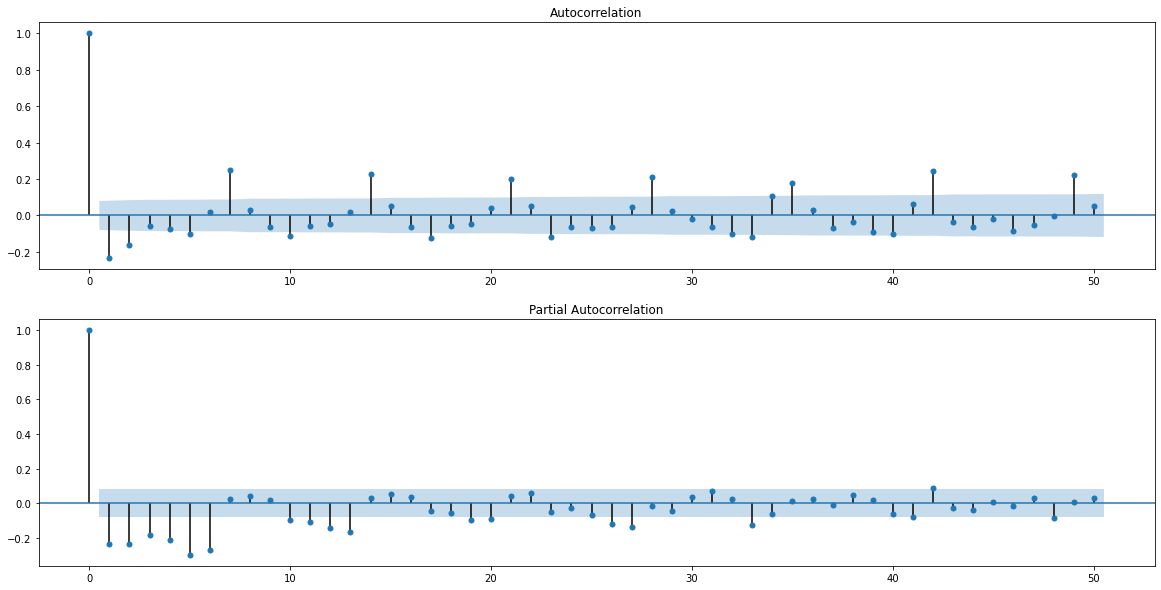

In [5]:
#we use train.diff()(differenced data), because this time series is unit root process.
import statsmodels.api as sm
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(train.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(train.diff().dropna(), lags=50, ax=ax[1])
plt.show()

From Autocorrelation, we can see that there's a recurring pattern every 7 periods, indicating a weekly pattern exists; hence p=6.
Since our time series data is stationary, no differencing is needed, so d=0.
Since there's seasonality, we will use Seasonal Moving Average models instead of regular Moving Average models.

# Finding best q for ARIMA hyperparameter

In [6]:
# grid search method for best parameters (changed to markdown)
from sklearn.metrics import mean_squared_error
q_list = []
MSE_list = []

for q in range(0,10):
    # fit the model
    arima = sm.tsa.statespace.SARIMAX(train,order=(6,0,q),freq='D',seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
    # get the prediction
    pred = arima.predict(train_end,test_end)[1:]
    # calculate the MSE
    MSE = mean_squared_error(test,pred)
    # append the values
    q_list.append(q)
    MSE_list.append(MSE)

#create a dict to store the key:values then change to dataframe for easier/cleaner access
score_dict = {
    'q': q_list,
    'MSE': MSE_list,
}

score_df = pd.DataFrame.from_dict(score_dict)

score_df.loc[score_df['MSE']==score_df.MSE.min()]

C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Max

,q,MSE
4,4,61539.977967


In [7]:
# double check iwth auto_arima
from pmdarima.arima import auto_arima
auto_arima(train, exogenous=None, 
           start_p=5, d=None, start_q=0, max_p=8, max_d=2, max_q=10, 
           start_P=0, D=None, start_Q=0, max_P=0, max_D=0, max_Q=0, m=0, 
           seasonal=False, stationary=True)

ModuleNotFoundError: No module named 'pmdarima'

# ARIMA Modeling
We will use SARIMAX but with seasonal_order =  all zeros, so it has same result as ARIMA, for the order parameters we will use 6,0,4

In [ ]:
# fit
arima = sm.tsa.statespace.SARIMAX(train,order=(6,0,4),freq='D',seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

In [ ]:
#get the diagnostics for the model
arima.plot_diagnostics(figsize=(15, 12))
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\arima_diagnostics.png')
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In the top right plot, we see that the KDE line follows pretty close with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). This is also an indication that the residuals are normally distributed.

The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

In [ ]:
#Metrics; calculate the R-squared, MSE, MAE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
pred = arima.predict(train_end,test_end)[1:]

#record the results into a list
model_list = ['ARIMA']
R2_list = []
mean_SE_list = []
mean_AE_list = []
R2_list.append(r2_score(test,pred))
mean_SE_list.append(mean_squared_error(test,pred))
mean_AE_list.append(mean_absolute_error(test,pred))
print('ARIMA model R2:{}'.format(r2_score(test,pred)))
print('ARIMA model MSE:{}'.format(mean_squared_error(test,pred)))
print('ARIMA model MAE:{}'.format(mean_absolute_error(test,pred)))

In [ ]:
#let's view the plot of test vs pred
pd.DataFrame({'test':test,'pred':pred}).plot()
plt.suptitle('ARIMA test vs prediction')
plt.legend(["Test", "Predict"]) 
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\arima_test_pred.png')
plt.show()

# ARIMAX
ARIMA with features

In [ ]:
#create another df and add features: month, day of week
buf = df2.copy()
#month one hot encoding
buf['month'] = buf.index.month
month_dummies = pd.get_dummies(buf['month'])
month_dummies.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
buf = pd.concat([buf, month_dummies], axis=1).drop(['month'],axis=1)
#dayofweek one hot encoding
buf['dayofweek'] = buf.index.weekday
week_dummies = pd.get_dummies(buf['dayofweek'])
week_dummies.columns = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
buf = pd.concat([buf, week_dummies], axis=1).drop(['dayofweek'],axis=1)

In [ ]:
#re do test and train data with features added
train_start,train_end = '2016-01-04','2017-08-31'
test_start,test_end = '2017-09-01','2017-12-31'
train = df2['Daily'][train_start:train_end].dropna()
test = df2['Daily'][test_start:test_end].dropna()
exog_train = buf[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
                  'Mon','Tue','Wed','Thu','Fri','Sat','Sun']][train_start:train_end].dropna()
exog_test = buf[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
                 'Mon','Tue','Wed','Thu','Fri','Sat','Sun']][test_start:test_end].dropna()

In [ ]:
# fit
arimax = sm.tsa.statespace.SARIMAX(train,order=(6,0,4),seasonal_order=(0,0,0,0),exog = exog_train,freq='D',
                                  enforce_stationarity=False, enforce_invertibility=False,).fit()
arimax.summary()

In [ ]:
#get the diagnostics for the model
arimax.plot_diagnostics(figsize=(15, 12))
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\arimax_diagnostics.png')
plt.show()

In [ ]:
#Metrics; calculate the R-squared, MSE, MAE
pred = arimax.predict(train_end,test_end,exog = exog_test)[1:]
# record the scores
model_list.append('ARIMAX')
R2_list.append(r2_score(test,pred))
mean_SE_list.append(mean_squared_error(test,pred))
mean_AE_list.append(mean_absolute_error(test,pred))
print('ARIMAX model R2:{}'.format(r2_score(test,pred)))
print('ARIMAX model MSE:{}'.format(mean_squared_error(test,pred)))
print('ARIMAX model MAE:{}'.format(mean_absolute_error(test,pred)))

In [ ]:
# plot test vs pred
pd.DataFrame({'test':test,'pred':pred}).plot()
plt.suptitle('ARIMAX test vs prediction')
plt.legend(["Test", "Predict"]) 
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\arimax_test_pred.png')
plt.show()

# SARIMAX Model

# grid search method for best parameters for seasonal order
P_list = []
Q_list = []
MSE_list = []

for P in range(0,12):
    for Q in range(0,12):
        # fit the model
        sarimax = sm.tsa.statespace.SARIMAX(train,order=(6,0,4),freq='D',seasonal_order=(P,1,Q,1), 
                                            enforce_stationarity=False, enforce_invertibility=False,).fit()
        # get the prediction
        pred = sarimax.predict(train_end,test_end)[1:]
        # calculate the MSE
        MSE = mean_squared_error(test,pred)
        # append the values
        P_list.append(P)
        Q_list.append(Q)
        MSE_list.append(MSE)
#create a dict to store the key:values then change to dataframe for easier/cleaner access 
score_dict = { 'P': P_list, 'Q': Q_list, 'MSE': MSE_list, }
score_df = pd.DataFrame.from_dict(score_dict)
score_df.loc[score_df['MSE']==score_df.MSE.min()]

The result came up to be
P=11 Q=4

In [ ]:
# fit
sarimax = sm.tsa.statespace.SARIMAX(train,order=(6,0,4),seasonal_order=(6,0,4,1),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
sarimax.summary()

In [ ]:
#get the diagnostics for the model
sarimax.plot_diagnostics(figsize=(15, 12))
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\sarimax_diagnostics.png')
plt.show()

In [ ]:
#Metrics; calculate the R-squared, MSE, MAE
pred = sarimax.predict(train_end,test_end,exog = exog_test)[1:]
# record the scores
model_list.append('SARIMAX')
R2_list.append(r2_score(test,pred))
mean_SE_list.append(mean_squared_error(test,pred))
mean_AE_list.append(mean_absolute_error(test,pred))
print('ARIMAX model R2:{}'.format(r2_score(test,pred)))
print('ARIMAX model MSE:{}'.format(mean_squared_error(test,pred)))
print('ARIMAX model MAE:{}'.format(mean_absolute_error(test,pred)))

In [ ]:
plt.plot(pd.DataFrame({'test':test,'pred':pred}))
plt.title('SARIMAX test vs prediction')
plt.legend(["Test", "Predict"]) 
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\sarimax_test_pred.png')
plt.show()

In [ ]:
# view the model and its scores
model_score_dict = {
    'model': model_list,
    'R2': R2_list,
    'MSE': mean_SE_list,
    'MAE': mean_AE_list,
}
model_score_df = pd.DataFrame.from_dict(model_score_dict)
model_score_df

Surprisingly, after introducing the month and day of week features, the models with such features have worse score. It is very obvious if we are to compare the models by their R squared. ARIMA has the best models scores from the other two. However, since we had d=0 in the order parameter, it is actually the same as ARMA model.

In [ ]:
# view the model and its test vs pred 
arima_pred = arima.predict(train_end,test_end)[1:]
arimax_pred = arimax.predict(train_end,test_end,exog = exog_test)[1:]
sarimax_pred = sarimax.predict(train_end,test_end,exog = exog_test)[1:]
pd.DataFrame({'True':test,'arima':arima_pred,'arimax':arimax_pred,'sarimax':sarimax_pred}).plot()
plt.suptitle('True vs Predictions')
plt.legend(["Test", "Arima","Arimax","Sarimax"]) 
plt.show()

The predictions are very close to each other, but we can see that Arimax has more zigzag than the other two models, indicating stronger periodicity pattern (day of week's influence). We will take a closer look at Arima vs Arimax.

In [ ]:
from IPython.display import Image
Image('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\arima_test_pred.png') 

In [ ]:
Image('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\arimax_test_pred.png') 

ARIMA's predictions looks like a simpler function, while ARIMAX's predictions have more variation. If we take a closer look, ARIMAX's zigzag patterns follows the Testing data better than ARIMA model; especially near the end of Nov.